## Assignment 2: $k$ Nearest Neighbor
Lydia Lee (yzg7bf)
### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression predicts a continuous numeric outcome, like income, temperature, or time until death. The output can take any real value. Classification predicts a categorical outcome like yes/no, spam/notspam, or survive/die. This output is a discrete class label.
2. A confusion matrix is a table that summarizes how well a classification model performs by comparing predicted labels to actual labels. For binary classification, it includes true positives, true negatives, false positives, and false negatives. It helps us understand what types of errors the model makes, whether it confuses certain classes, and metrics like accuracy, precision, recall, and specificity.
3. Accuracy is the proportion of correct predictions. The problem is that accuracy can be misleading when classes are imbalanced. Accuracy doesn't tell us how well the model detects rare events and whether it is biased toward the majority class.
4. Root Mean Squared Error measures the average size of prediction errors in regression. It tells us how far predictions are from actual values on average and the typical magnitude of error. Lower RMSE means better predictive performance.
5. Overfitting is whena model learns the training data too well, including noise. It generally means very low training error, high test error, poor generalization. Underfitting happens when a model is too simple to capture the underlying pattern. It generally means high training error, high test error, and the model is too rigid. The goal is to find a model that balances bias and variance.
6. If we evaluate a model on the same data used to train it, we get an overly optimistic estimate of performance. Splitting into training set and testing set helps measure how well teh model generalizes to new data. When choosing k, we pick the value that performs best on unseen data, not the training set. This helps prevent overfitting and improves real-world performance.
7. In classification, we can output the class label. The strengths are that it is simple and easy to interpret, the decision is clear, and it is useful when a final action must be taken. However, the weaknesses are it doesn't show uncertainty, doesn't allow flexible threshold selection, and might hide important risk information.
We can also output probability distribution. The strengths are that it shows model confidence, allows decision-makers to set thresholds, and is more informative for risk-based decisions. The weaknesses are that it requires additional interpretation and can be poorly calibrated.

In [1]:
! git clone https://github.com/ds4e/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
landmines = pd.read_csv("./data/land_mines.csv")
landmines.head()


,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [46]:
landmines.shape

(338, 4)

In [47]:
landmines.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [48]:
print(landmines["mine_type"].value_counts())
print(landmines["mine_type"].value_counts(normalize=True))

mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64
mine_type
1    0.210059
2    0.207101
3    0.195266
4    0.195266
5    0.192308
Name: proportion, dtype: float64


The classes are pretty balanced. Mine type 1 and 2 are more similar, and then mine types 3, 4, and 5 are also similar.

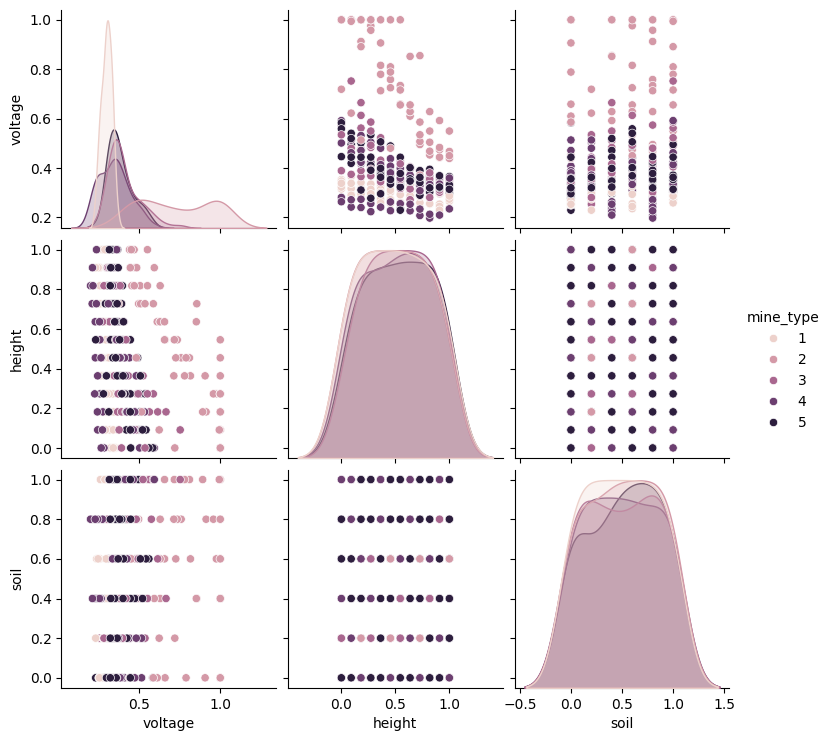

In [50]:
sns.pairplot(landmines, hue="mine_type", vars=["voltage", "height", "soil"])
plt.show()

There are no strong, clear clusters. There is a lot of overlap between classes. Mine type 2 seems to have slightly higher voltage values and more spread towards the upper right.

In [52]:
X = landmines[["voltage", "height", "soil"]]
y = landmines["mine_type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=100, stratify=y
)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
k_values = range(1, 26, 2)
accuracies = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    accuracies[k] = acc
    print(f"k={k}, Accuracy={acc:.3f}")

best_k = max(accuracies, key=accuracies.get)
print("Best k:", best_k)

k=1, Accuracy=0.438
k=3, Accuracy=0.491
k=5, Accuracy=0.414
k=7, Accuracy=0.438
k=9, Accuracy=0.444
k=11, Accuracy=0.414
k=13, Accuracy=0.456
k=15, Accuracy=0.444
k=17, Accuracy=0.426
k=19, Accuracy=0.414
k=21, Accuracy=0.426
k=23, Accuracy=0.426
k=25, Accuracy=0.426
Best k: 3


Small k indicates overfitting (high variance) and large k indicates underfitting (high bias). I selected the value of k that maximized classification accuracy on the test set.

In [55]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_scaled, y_train)

y_hat = final_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_hat))

cm = confusion_matrix(y_test, y_hat)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test, y_hat))

Accuracy: 0.4911242603550296
Confusion Matrix:
 [[27  0  4  2  3]
 [ 0 30  1  3  1]
 [12  3 11  1  6]
 [10  2  8  9  4]
 [ 9  1 13  3  6]]
              precision    recall  f1-score   support

           1       0.47      0.75      0.57        36
           2       0.83      0.86      0.85        35
           3       0.30      0.33      0.31        33
           4       0.50      0.27      0.35        33
           5       0.30      0.19      0.23        32

    accuracy                           0.49       169
   macro avg       0.48      0.48      0.46       169
weighted avg       0.48      0.49      0.47       169



The overall classification accuracy was approximately 49%, which is substantially better than random guessing (20%) but still moderate.

Mine type 1 and 2 were classified most accurately, with recall values of 75% and 86%, respectively. Type 2 was identified very reliably, suggesting that its feature values may be more distinct from other classes.

However, mine types 3, 4, and 5 performed poorly, with recall values of 33%, 27%, and 19%, respectively. These classes were frequently confused with one another.

This pattern suggests significant overlap in feature space among mine types 3, 4, and 5, whereas type 2 appears more separable.

This predictive model should be used as a decision-support tool rather than as a fully automated decision system. Given that some mine types are misclassified, particularly when feature values overlap, relying solely on the model could lead to dangerous mistakes. In practice, predictions should be accompanied by probability estimates or uncertainty measures. When the model is uncertain or when predicted classes correspond to high-risk mine types, additional inspection or verification procedures should be required. The model may be useful for prioritizing investigation or triaging likely mine types, but final decisions should incorporate human expertise and additional sensor data.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("./data/USA_cars_datasets.csv")

In [4]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
df.shape

(2499, 13)

In [6]:
df.columns

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [7]:
df = df[["price", "year", "mileage"]]

In [8]:
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [9]:
df.shape

(2499, 3)

In [10]:
df.isna().sum()

,0
price,0
year,0
mileage,0


In [11]:
def maxmin_scale(series):
  return (series - series.min()) / (series.max() - series.min())

df["year_scaled"] = maxmin_scale(df["year"])
df["mileage_scaled"] = maxmin_scale(df["mileage"])

X = df[["year_scaled", "mileage_scaled"]]
y = df["price"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=100
)

print(X_train.shape)
print(X_test.shape)

(1999, 2)
(500, 2)



K = 3
MSE = 126446573.21822222


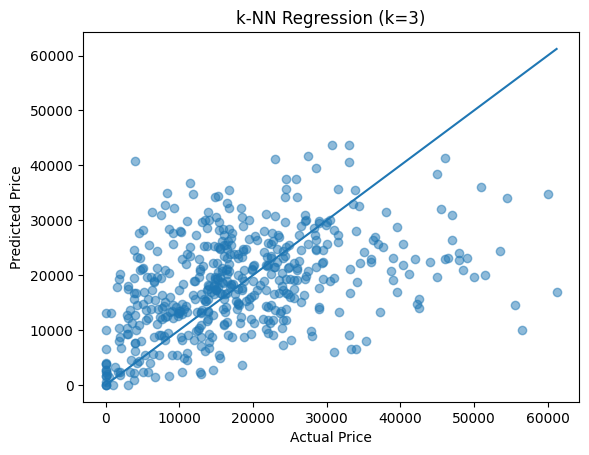


K = 10
MSE = 110802185.58681999


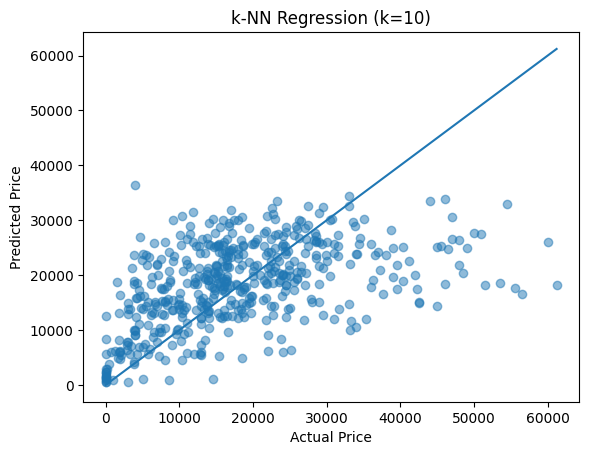


K = 25
MSE = 103170457.848608


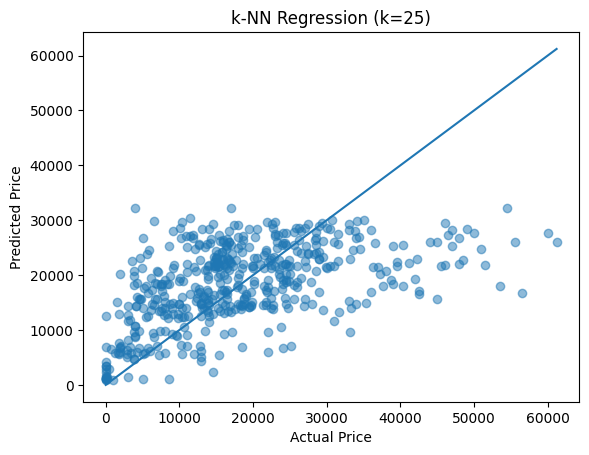


K = 50
MSE = 99695443.96419598


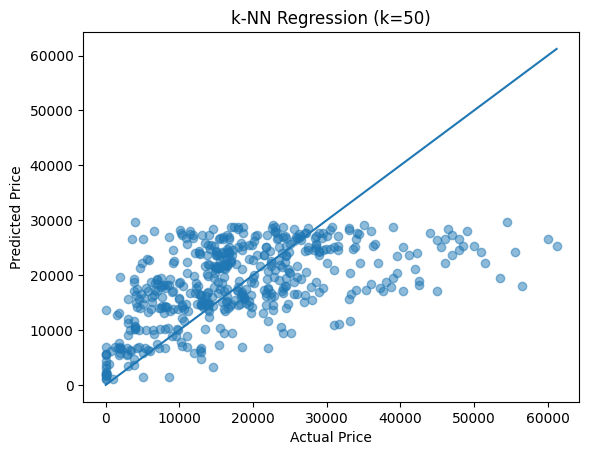


K = 100
MSE = 98271058.96092059


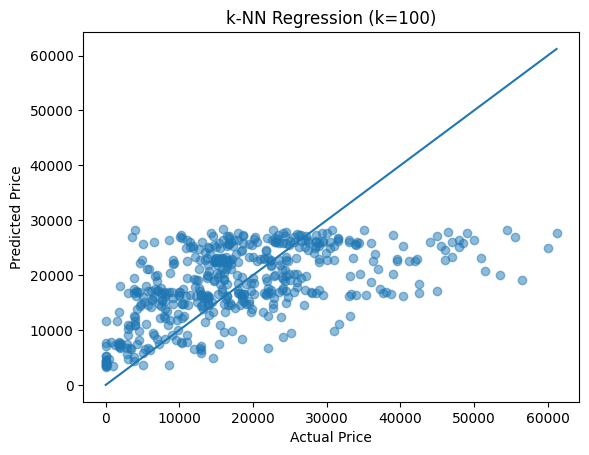


K = 300
MSE = 100477298.914212


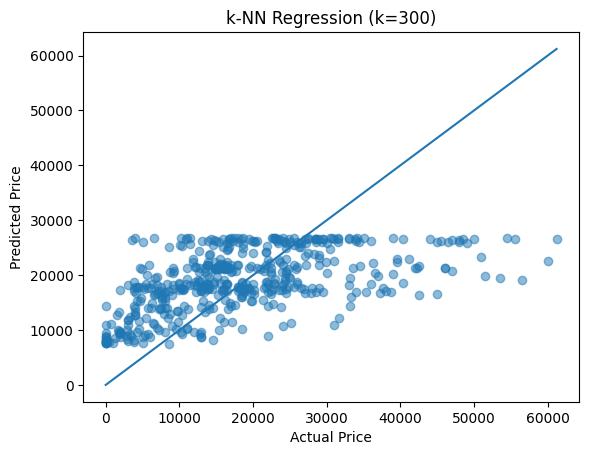

In [13]:
k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_hat = model.predict(X_test)

    mse = mean_squared_error(y_test, y_hat)
    mse_results[k] = mse

    print(f"\nK = {k}")
    print("MSE =", mse)

    # Scatterplot: Actual vs Predicted
    plt.figure()
    plt.scatter(y_test, y_hat, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k-NN Regression (k={k})")

    # Ideal line
    min_val = min(y_test.min(), y_hat.min())
    max_val = max(y_test.max(), y_hat.max())
    plt.plot([min_val, max_val], [min_val, max_val])

    plt.show()


As k increases, the predictions become progressively smoother and less sensitive to individual observations.

For smaller values of k, the predicted prices vary widely and closely follow individual nearby training points. The scatter plot shows substantial spread.

As k increases, the predictions stabilize. The scatterplot shows points clustering more tightly around the line, and extreme prediction errors decrease.

As k becomes really large, the predictions begin to shrink toward the overall mean price. In the scatterplot, predicted values become compressed into a narrower range. Expensive cars tend to be underpredicted and inexpensive cars tend to be overpredicted. The vertical spread decreases, but systematic bias becomes more visible.

In [14]:
print("\nMSE results:")
for k, mse in mse_results.items():
    print(f"k = {k}: MSE = {mse}")

optimal_k = min(mse_results, key=mse_results.get)
print("\nOptimal k based on lowest MSE:", optimal_k)


MSE results:
k = 3: MSE = 126446573.21822222
k = 10: MSE = 110802185.58681999
k = 25: MSE = 103170457.848608
k = 50: MSE = 99695443.96419598
k = 100: MSE = 98271058.96092059
k = 300: MSE = 100477298.914212

Optimal k based on lowest MSE: 100


For small values of k, the model overfits the data. The predictions were highly variable and closely followed local patterns in the training data. In the scatterplot, the points were widely dispersed around the 45-degree line, with many extreme predictions. This shows high variance (too sensitive to noise in the data)

As k increased to moderate values, the predictions became more stable and clustered closer to the 45-degree line. The spread of points decreased and the mean squared error was minimized around this range. This shows a good balance between bias and variance.

For large values of k, the mdoel began to underfit the data. Predctions became overly smooth and shrank the overall mean price. This shows high bias (the model is too simple and failed to capture meaningful variation in the data).

Small k is overfitting and large k is underfitting.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [16]:
airbnb = pd.read_csv("./data/airbnb_hw.csv")
airbnb.shape

(30478, 13)

In [27]:
airbnb = airbnb.loc[:, ["Review Scores Rating", "Price", "Beds"]].copy()
airbnb.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


In [28]:
airbnb["Price"] = (
    airbnb["Price"]
    .replace(',', '', regex=True)
    .astype(float)
    .replace("", np.nan)
)

In [29]:
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors="coerce")

In [30]:
airbnb["Beds"] = pd.to_numeric(airbnb["Beds"], errors="coerce")

In [31]:
airbnb["Review Scores Rating"] = pd.to_numeric(airbnb["Review Scores Rating"], errors="coerce")

In [18]:
airbnb_missing = airbnb.loc[airbnb["Review Scores Rating"].isnull()].copy()
airbnb_complete = airbnb.loc[~airbnb["Review Scores Rating"].isnull()].copy()

In [32]:
print(airbnb_missing.shape)
print(airbnb_complete.shape)

(8323, 3)
(22111, 3)


In [33]:
airbnb_complete = airbnb_complete.dropna(subset=["Price", "Beds"]).copy()
airbnb_complete.shape

(22111, 3)

In [34]:
scaler = MinMaxScaler()
X = airbnb_complete[["Price", "Beds"]]
y = airbnb_complete["Review Scores Rating"]

X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=100
)

k_values = [3, 5, 10, 20, 50, 100]
sse_results = {}

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_hat = model.predict(X_test)

    sse = np.sum((y_test - y_hat)**2)
    sse_results[k] = sse

    print(f"k={k}, SSE={sse}")

# Choose k with lowest SSE
optimal_k = min(sse_results, key=sse_results.get)
print("Optimal k:", optimal_k)

k=3, SSE=466523.3333333333
k=5, SSE=404669.95999999996
k=10, SSE=375158.10000000003
k=20, SSE=358660.6675
k=50, SSE=343652.8488
k=100, SSE=337995.8611
Optimal k: 100


In [36]:
final_model = KNeighborsRegressor(n_neighbors=optimal_k)
final_model.fit(X_scaled, y)

KNeighborsRegressor(n_neighbors=100)

In [37]:
price_med = airbnb_complete["Price"].median()
beds_med = airbnb_complete["Beds"].median()

In [38]:
airbnb_missing["Price"] = airbnb_missing["Price"].fillna(price_med)
airbnb_missing["Beds"] = airbnb_missing["Beds"].fillna(beds_med)

In [40]:
X_missing = airbnb_missing[["Price", "Beds"]]
X_missing_scaled = scaler.transform(X_missing)

predicted_ratings = final_model.predict(X_missing_scaled)

airbnb_missing["Predicted Rating"] = predicted_ratings
airbnb_missing.head()

,Review Scores Rating,Price,Beds,Predicted Rating
0,NaN,145.0,1.0,94.16
1,NaN,37.0,1.0,88.33
2,NaN,28.0,1.0,86.73
3,NaN,199.0,3.0,88.24
13,NaN,68.0,1.0,90.53


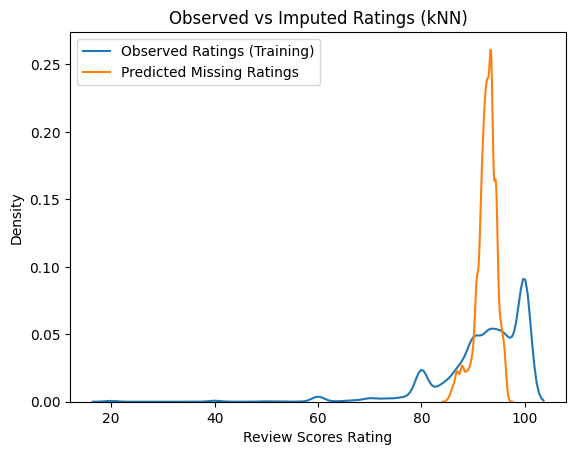

In [41]:
plt.figure()
sns.kdeplot(airbnb_complete["Review Scores Rating"], label="Observed Ratings (Training)")
sns.kdeplot(airbnb_missing["Predicted Rating"], label="Predicted Missing Ratings")
plt.xlabel("Review Scores Rating")
plt.title("Observed vs Imputed Ratings (kNN)")
plt.legend()
plt.show()

They do not look similar. They have some overlap, but the predicted distribution is much more concentrated and smoother than the observed one.

The observed ratings spread out over a wider range (about 80-100). There are multiple bumps in the density and more variability. There is a noticeable right tail near 100. This suggests that the real ratings have greater dispersion.

The predicted missing ratings are very tightly clustered around about 90-95, and it is a much narrower distribution. It is much taller with a sharper peak. This suggests that the imputed values are heavily shrunk toward the mean, and it lacks variability. The imputed distribution underestimates the true variability in ratings.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)